In [1]:
from model import Model
from exp import Exp
from sim_trial import do_sim
from plot import plot_trial, plot_IPI


import numpy as np
import matplotlib.pyplot as plt

import os

save_path = os.path.join(os.path.expanduser('~'),'Dropbox (Diedrichsenlab)','Papers','SequenceRepetition','figures_raw')
save_path

'/Users/mahdiyar/Dropbox (Diedrichsenlab)/Papers/SequenceRepetition/figures_raw'

In [2]:
M = Model(SigEps=0.01)
T = Exp()
T.seqShow()

T,SIM = do_sim(M,T)
#fig, ax =plot_trial(SIM,T)

# Horizen exp

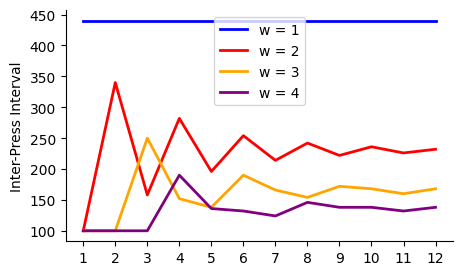

In [3]:
M = Model(SigEps=0,wFuture=0)
IPI = []
label = []
for w in range(1,5):
    T = Exp()
    T.horizon(w)
    
    T,SIM = do_sim(M,T,maxTime=20000)

    IPI.append(np.diff(T.pressTime))
    label.append('w = '+str(w))
    
fig, ax = plot_IPI(IPI,label)
fig.savefig(os.path.join(save_path,'ipi_window.png'),dpi=300)

# Model replicating behavior

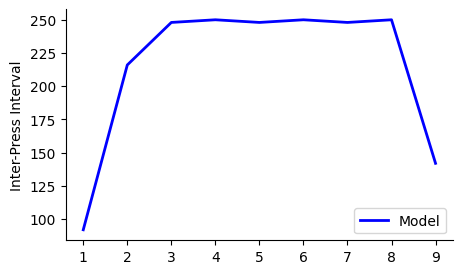

In [6]:
#M = Model(SigEps=0.000,wFuture=2,coeff=0.72,Bound=1.4675,capacity=3,Aintegrate=0.9956,power=1) this one generate behavior-like IPI
M = Model(SigEps=0.000,wFuture=2,coeff=0.72,Bound=1.4675,capacity=3,Aintegrate=0.9956,power=1)

IPI = []
T = Exp()
T.seqShow(RT=6000)
T,SIM = do_sim(M,T)
IPI.append(np.diff(T.pressTime))

fig, ax = plot_IPI(IPI,['Model'])
plt.show()
#fig.savefig(os.path.join(save_path,'ipi_model.png'),dpi=300)

# Try other triggering rule

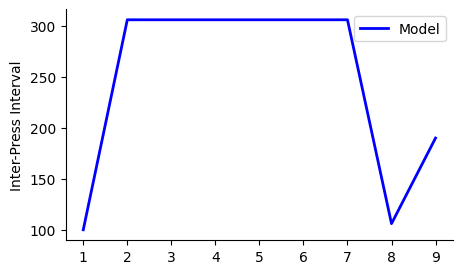

In [18]:
M = Model(SigEps=0.000,wFuture=2,coeff=0.45,Bound=1.4675,capacity=3,Aintegrate=0.9956,power=1.)

IPI = []
T = Exp()
T.seqShow(RT=6000)
T,SIM = do_sim(M,T,trigger_func='trig_sum')
IPI.append(np.diff(T.pressTime))

fig, ax = plot_IPI(IPI,['Model'])
plt.show()
#fig.savefig(os.path.join(save_path,'ipi_model.png'),dpi=300)

# play...

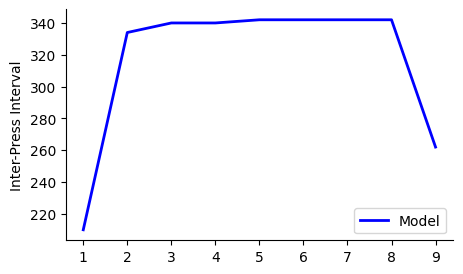

In [43]:
#M = Model(SigEps=0.000,wFuture=2,coeff=0.72,Bound=1.4675,capacity=3,Aintegrate=0.9956,power=1) this one generate behavior-like IPI
M = Model(SigEps=0.000,wFuture=3,coeff=0.79,Bound=1.5,Aintegrate=0.9956)

IPI = []
T = Exp()
T.seqShow(RT=6000)
T,SIM = do_sim(M,T,plan_func='plan_inv')
IPI.append(np.diff(T.pressTime))

fig, ax = plot_IPI(IPI,['Model'])
plt.show()